<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

SVR with Normalize & Polynomial Features

This Code template is for the regression analysis using a SVR where separate rescaling is done using Normalize and feature transformation is done using QuantileTransformer in a pipeline.

### **Required Packages**

In [1]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

### **Initialization**
Filepath of CSV file

In [2]:
file_path= ""

List of features which are required for model training .

In [4]:
features = []

Target feature for prediction.

In [5]:
target = ''

### **Dataset Overview**
Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


### **Dataset Information**
Print a concise summary of a DataFrame.

We will use info() method to print the information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   low     189 non-null    int64
 1   age     189 non-null    int64
 2   lwt     189 non-null    int64
 3   race    189 non-null    int64
 4   smoke   189 non-null    int64
 5   ptl     189 non-null    int64
 6   ht      189 non-null    int64
 7   ui      189 non-null    int64
 8   ftv     189 non-null    int64
 9   bwt     189 non-null    int64
dtypes: int64(10)
memory usage: 14.9 KB


### **Dataset Describe**
Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

We will analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

In [8]:
df.describe()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


### **Feature Selection**
It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [9]:
X=df[features]
Y=df[target]

### **Data Preprocessing**
Since we do not know what is the number of Null values in each column.So,we print the columns arranged in descreasnig orde 

In [10]:
print(df.isnull().sum().sort_values(ascending=False))

bwt      0
ftv      0
ui       0
ht       0
ptl      0
smoke    0
race     0
lwt      0
age      0
low      0
dtype: int64


Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv
0,0,19,182,2,0,0,0,1,0
1,0,33,155,3,0,0,0,0,3
2,0,20,105,1,1,0,0,0,1
3,0,21,108,1,1,0,0,1,2
4,0,18,107,1,1,0,0,1,0


#### **Correlation Map**
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

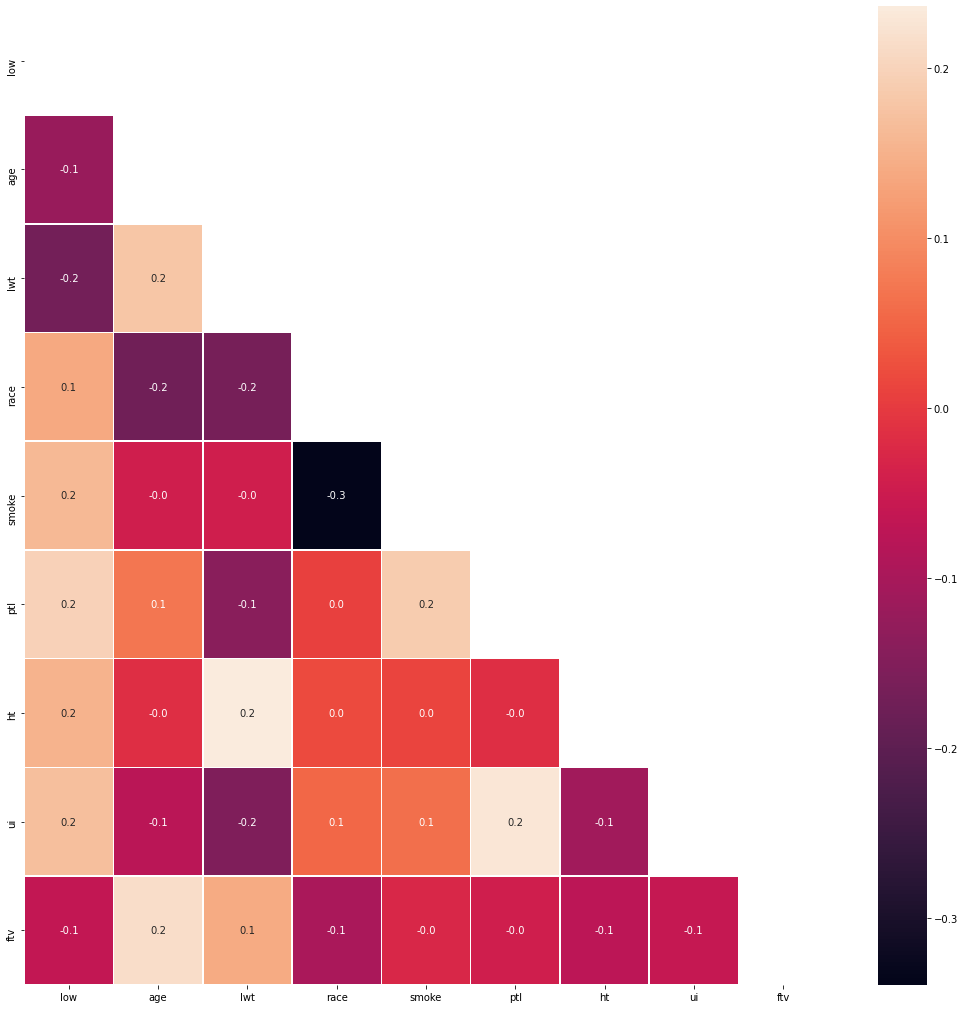

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## **Data Splitting**
For rescaling the data normalize function of **sklearn** is used.

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

The function normalize provides a quick and easy way to scale input vectors individually to unit norm (vector length).

In [14]:
X_norm = normalize(X, axis=0)
X=pd.DataFrame(X_norm)
X.head(5)

,0,1,2,3,4,5,6,7,8
0,0.0,0.057993,0.099277,0.070578,0.000000,0.0,0.0,0.188982,0.000000
1,0.0,0.100724,0.084549,0.105868,0.000000,0.0,0.0,0.000000,0.165145
2,0.0,0.061045,0.057275,0.035289,0.116248,0.0,0.0,0.000000,0.055048
3,0.0,0.064097,0.058912,0.035289,0.116248,0.0,0.0,0.188982,0.110096
4,0.0,0.054940,0.058366,0.035289,0.116248,0.0,0.0,0.188982,0.000000


## **Data Splitting**
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### **Polynomial Features**
**sklearn.preprocessing.PolynomialFeatures()**

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

### **Model**
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

Here we will use SVR, the svr implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and maybe impractical beyond tens of thousands of samples.

**Model Tuning Parameters**
> C : float, default=1.0 -> Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty..

> kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ -> Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

> gamma : {‘scale’, ‘auto’} or float, default=’scale’ ->Gamma is a hyperparameter that we have to set before the training model. Gamma decides how much curvature we want in a decision boundary.

> degree : int, default=3 -> Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.Using degree 1 is similar to using a linear kernel. Also, increasing degree parameter leads to higher training times.

### Quantile Transformer
This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) for the parameters

In [16]:
model = make_pipeline(QuantileTransformer(),SVR())
model.fit(x_train,y_train)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()), ('svr', SVR())])

#### **Model Accuracy**
We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.

In [17]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 1.76 %



> r2_score: The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

> mae: The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

> mse: The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [18]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 1.76 %
Mean Absolute Error 570.72
Mean Squared Error 451179.80


#### **Prediction Plot**
> First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

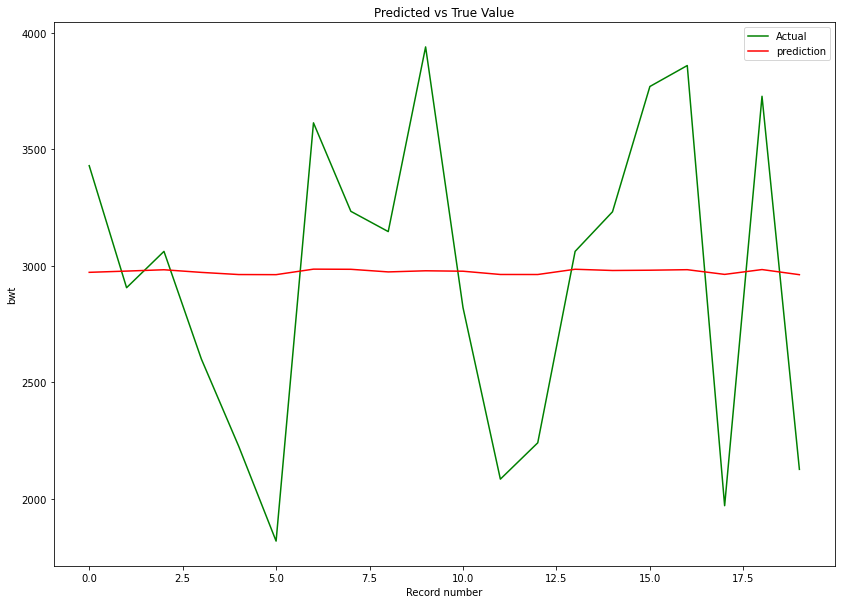

In [19]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Akshar Nerkar , Github: [Profile](https://github.com/Akshar777)
